# Exploring Urban Bike Share Trends Across Three Major Cities: A Data Science Exploration with R

Written and explored by: Kyle Mair

## What is this project about?

In this project, I use R programming and several R packages to explore and analyze real-world data provided by **Motivate**, a leading bike share system provider in the U.S.

Bicycle-sharing systems have been implemented across major cities in the United States, offering a convenient and flexible transportation option for urban travelers. These systems allow users to rent bicycles for short-term use—whether for commuting, errands, or leisure—and return them to any designated station. A single bicycle can serve multiple customers in a day thanks to the system’s efficient turnaround process. Users typically unlock bikes using mobile apps or kiosks, and return them either to the same location or a different station, ending the rental period easily.

Because these systems rely heavily on digital infrastructure, they generate useful datasets capturing customer interactions, travel patterns, and system usage.

This analysis focuses on answering the following business questions of interest using this collected data:

1. What are the most popular times for users to travel by month, day and hour?
2. Which stations and trips are most commonly used (start stations, and end stations)?

## What are the different features and attributes available in the datasets?
This project will use three different csv files (Udacity, 2025) from the original dataset. Each csv file is bike share data from one of the Major U.S cities (Chicago, New York City, Washington, D.C.). While more data is available from the original dataset from **Motivate**, this project will do an analysis only on these three major cities where the greatest amount of data is found.


_____

In [1]:
ny <- read.csv('new-york-city.csv')
wash <- read.csv('washington.csv')
chi <- read.csv('chicago.csv')

In [2]:
names(ny)
names(chi)
names(wash)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

-----


To begin exploring the dataset (Udacity, 2025), there are nine possible columns that may appear across the city files:
1. X – A unique identifier for each trip record in the dataset.
2. Start.Time – The timestamp indicating when the user began the ride.
3. End.Time – The timestamp indicating when the user ended the ride.
4. Trip.Duration – The total duration of the trip, measured in seconds.
5. Start.Station – The name or address of the station where the bike was picked up.
6. End.Station – The name or address of the station where the bike was returned.
7. User.Type – Indicates whether the user is a "Subscriber" or a "Customer."
8. Gender – The recorded gender of the user.
9. Birth.Year – The recorded year of birth for the user.

While the files for the major cities New York City and Chicago have information on all 9 columns, the file and data collected for Washington, D.C. does not have any data on the "Gender" and "Birth.Year" column.


## Quickly cleaning the datasets
In this section I will quickly make changes to the dataset to better support by analysis.

___

In [3]:
head(ny,5)
head(wash,5)
head(chi,5)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992


,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
2,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
3,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
4,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
5,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber


,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
2,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
3,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
4,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
5,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975


In [4]:
ny$Start.Time <- as.POSIXct(ny$Start.Time, format = "%Y-%m-%d %H:%M:%S")
ny$End.Time   <- as.POSIXct(ny$End.Time,   format = "%Y-%m-%d %H:%M:%S")

wash$Start.Time <- as.POSIXct(wash$Start.Time, format = "%Y-%m-%d %H:%M:%S")
wash$End.Time   <- as.POSIXct(wash$End.Time,   format = "%Y-%m-%d %H:%M:%S")

chi$Start.Time <- as.POSIXct(chi$Start.Time, format = "%Y-%m-%d %H:%M:%S")
chi$End.Time   <- as.POSIXct(chi$End.Time,   format = "%Y-%m-%d %H:%M:%S")

ny$Trip.Duration <- round(as.numeric(ny$Trip.Duration))
wash$Trip.Duration <- round(as.numeric(wash$Trip.Duration))
chi$Trip.Duration <- round(as.numeric(chi$Trip.Duration))

In [5]:
head(ny,5)
head(wash,5)
head(chi,5)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992


,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
,<int>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489,14th & Belmont St NW,15th & K St NW,Subscriber
2,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,403,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
3,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
4,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
5,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber


,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
2,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
3,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
4,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
5,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975


----

The files used in this dataset were already pre-cleaned, so all I did was change the datatypes of certain columns to be datatypes that I perferred and knew would be more useful in analysis.



## What are the most popular times for users to travel?
This section answers the first major business question of interest planned in the introduction to the project. What are the most popular times for users to travel?

I will start by looking at the most common months that users travel.

___

In [6]:
install.packages('ggplot2')
library(ggplot2)


The downloaded binary packages are in
	/var/folders/yx/np_2kgdn5rjb_4mgnjr_jl980000gn/T//RtmpkFTt6J/downloaded_packages


In [7]:
ny$City <- 'New York City'
wash$City <- 'Washington, D.C.'
chi$City <- 'Chicago'

comb_cities <- rbind(ny[, c(1:7, 10)], chi[, c(1:7, 10)], wash)
head(comb_cities,5)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City
,<int>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,New York City
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,New York City
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,New York City
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,New York City
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,New York City


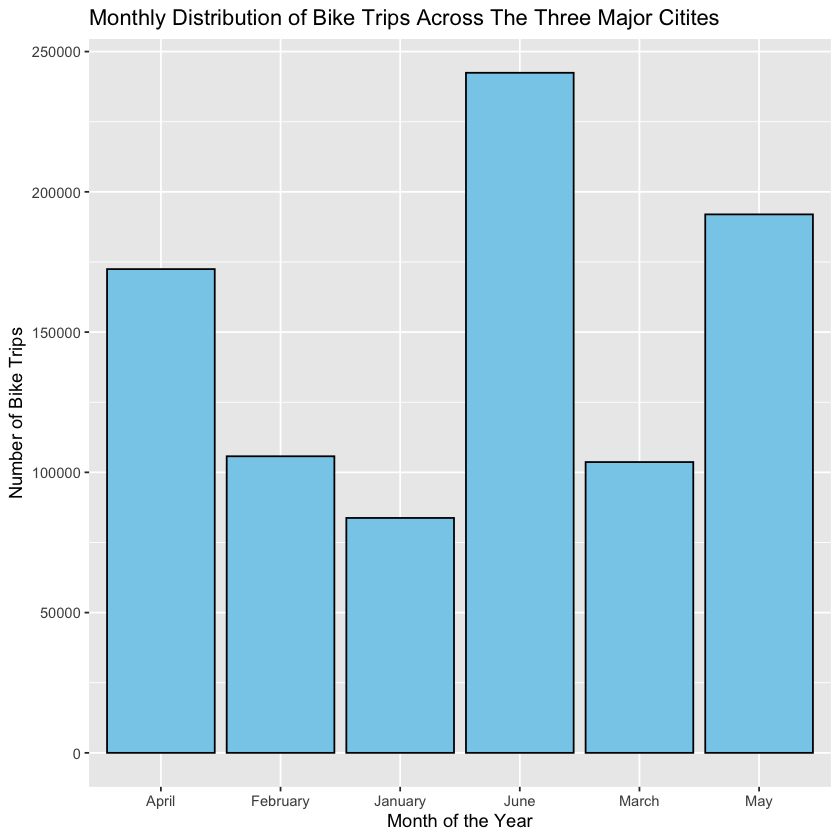

In [8]:
ggplot(comb_cities, aes(x=format(Start.Time, "%B"))) +
geom_bar(fill='skyblue', color='black') +
labs(y='Number of Bike Trips', x='Month of the Year', title="Monthly Distribution of Bike Trips Across The Three Major Citites")
     

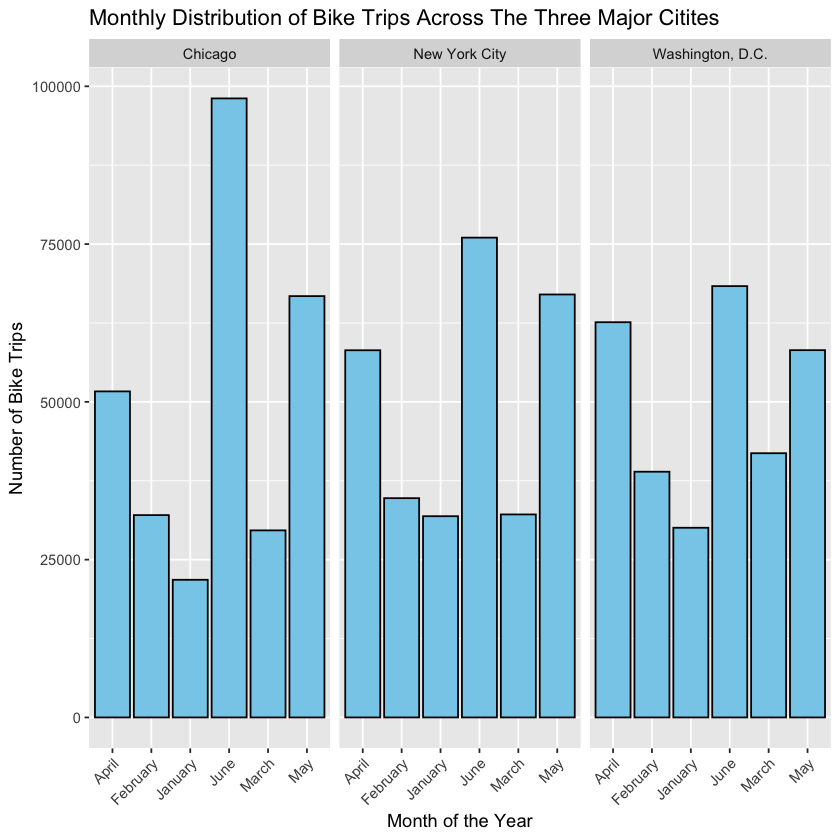

In [9]:
ggplot(comb_cities, aes(x=format(Start.Time, "%B"))) +
geom_bar(fill='skyblue', color='black') +
labs(y='Number of Bike Trips', x='Month of the Year', title="Monthly Distribution of Bike Trips Across The Three Major Citites")+
facet_wrap(~City)+
theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [10]:
table(format(comb_cities$Start.Time, "%Y-%m"))


2017-01 2017-02 2017-03 2017-04 2017-05 2017-06 
  83744  105730  103666  172455  191963  242442 

---

### Most popular times for bike travel by month

Above I observed the most common months that users borrowed bikes for bike traveling. When all the three major cities data is combined together we can see that June has the highest count of bike travel records (242,422), while January has the lowest count of bike travel records (83,744). Even with the data side by side for the three major cities June still has the highest count of bike travel records of users borrowing the bike for their uses and January has the lowest count. This is how the bike trips for users is distributed over the first 6 months of data collected. I next wanted to see how this distribution differed for days of the week.

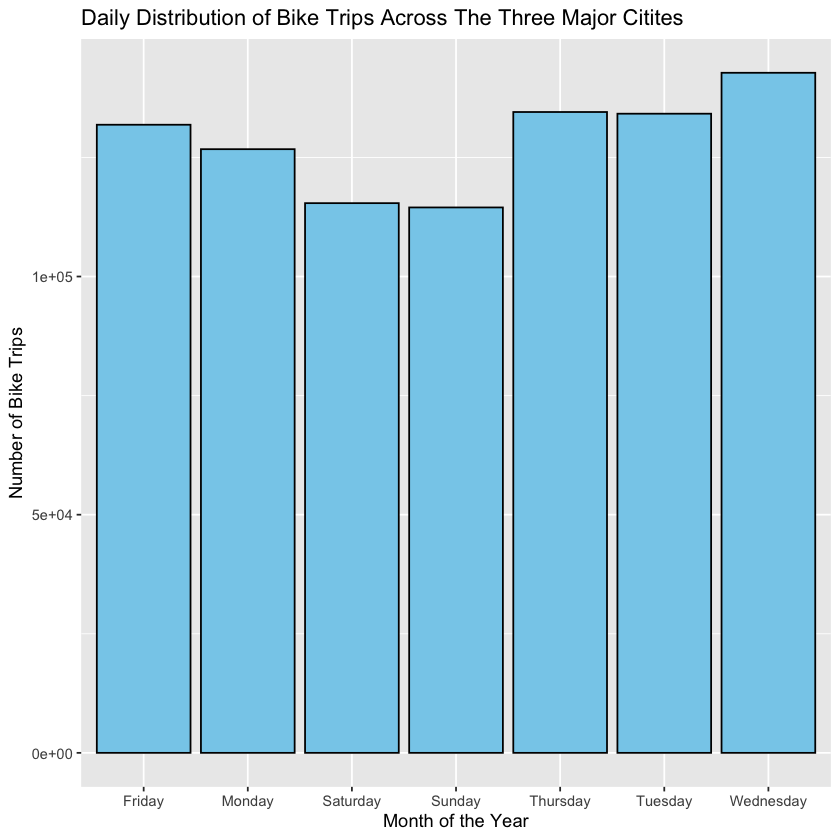

In [11]:
ggplot(comb_cities, aes(x=format(Start.Time, "%A"))) +
geom_bar(fill='skyblue', color='black') +
labs(y='Number of Bike Trips', x='Month of the Year', title="Daily Distribution of Bike Trips Across The Three Major Citites")
     

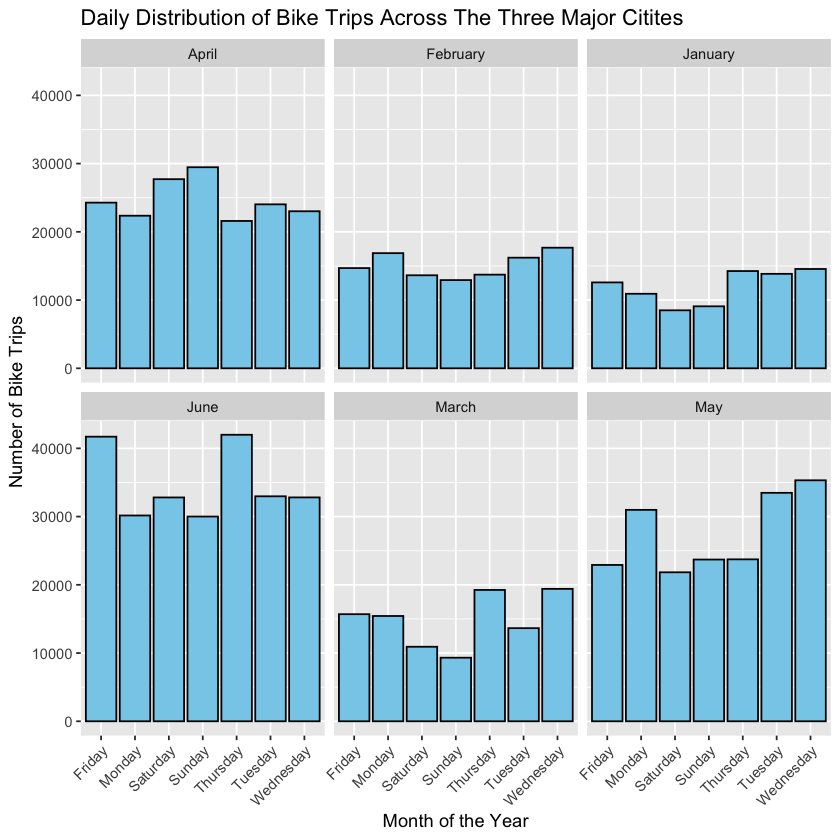

In [12]:
ggplot(comb_cities, aes(x=format(Start.Time, "%A"))) +
geom_bar(fill='skyblue', color='black') +
labs(y='Number of Bike Trips', x='Month of the Year', title="Daily Distribution of Bike Trips Across The Three Major Citites")+
facet_wrap(~format(comb_cities$Start.Time, "%B")) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Most popular times for bike travel by day of week
In the analysis above, I examined the most popular days of the week for bike travel across three major U.S. cities. Overall, Wednesdays consistently emerged as the most popular day for bike usage during the first half of the year, while Sundays were generally the least popular. However, when breaking the data down by month, a few notable patterns emerged:
1. In April, Sundays surprisingly saw the highest bike usage.
2. In January, February, March, and May, Wednesdays remained the most popular day for riding.
3. By June, Thursdays and Fridays saw a rise in popularity, indicating a possible shift toward end-of-week travel.

These trends suggest that bike usage patterns vary not only by day of the week but also by seasonal and monthly factors.

All in all, for the first half of the year June sees the most activity with bike travel from users of the bike share system and Juanary sees the least travel activity. This shows there may be a coorelation with warmer weather and more interest in bike travel. Interest in bike travel can differ by the days of the week based on what season we are in, so that can be important to keep track of for marketing and inventory.


## Which stations and trips are most commonly used?
In this section I answer the second major business question of interest. For start and stop stations, what are the most commonly used stations?

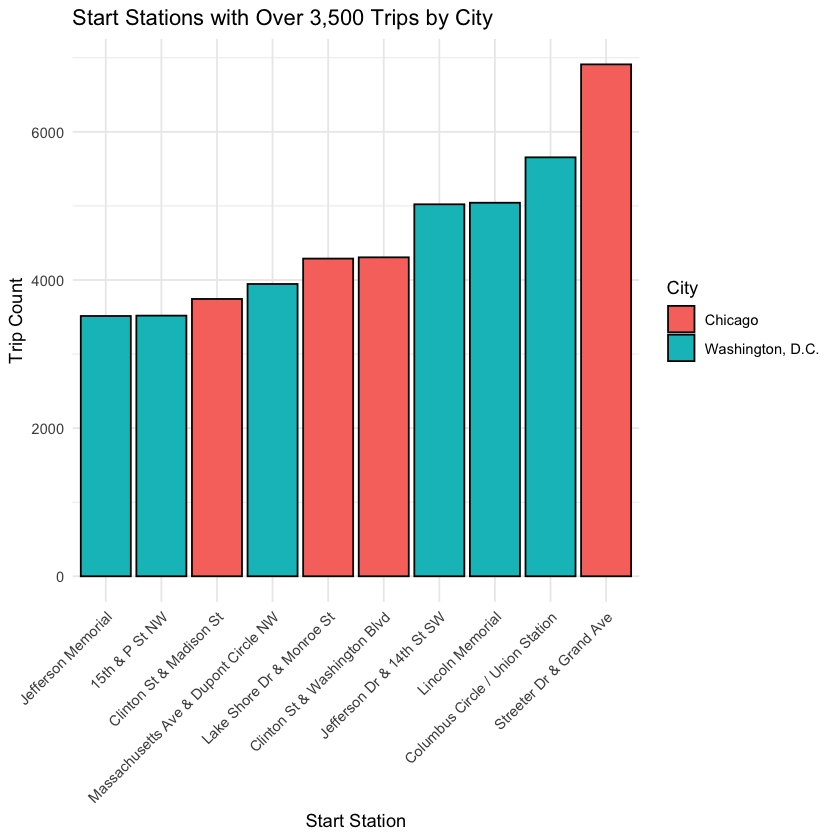

In [13]:
station_counts <- table(comb_cities$City, comb_cities$Start.Station)
station_df <- as.data.frame(station_counts)
colnames(station_df) <- c("City", "Start.Station", "Count")
station_df_filtered <- station_df[station_df$Count > 3500, ]

ggplot(station_df_filtered, aes(x = reorder(Start.Station, Count), y = Count, fill = City)) +
  geom_bar(stat = "identity", color = "black") +
  labs(title = "Start Stations with Over 3,500 Trips by City",
       x = "Start Station",
       y = "Trip Count") +
  theme_minimal() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))

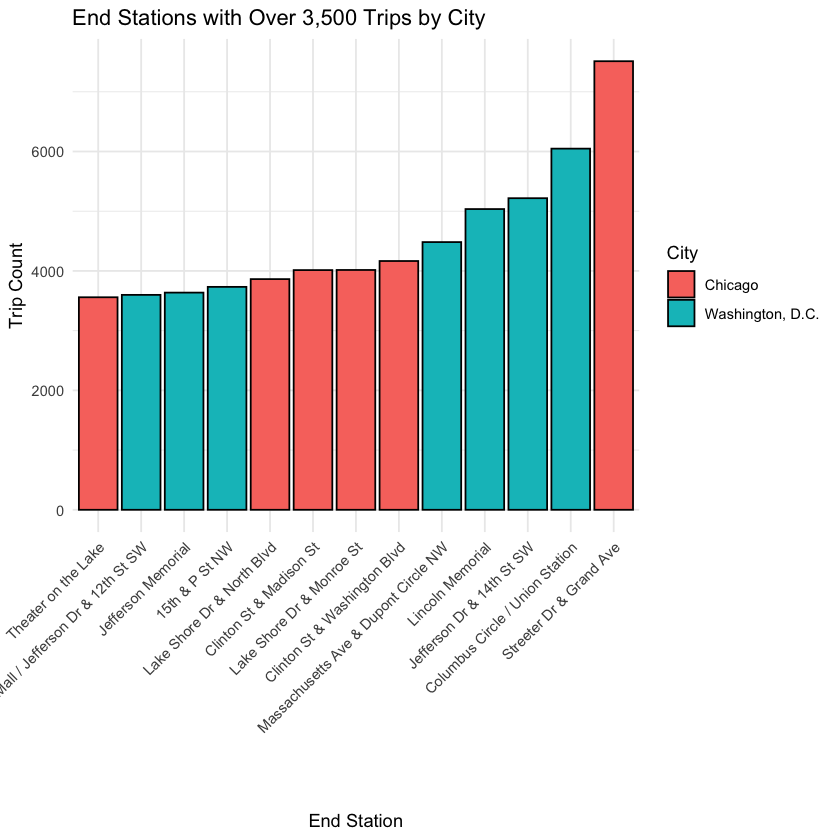

In [14]:
station_counts <- table(comb_cities$City, comb_cities$End.Station)
station_df <- as.data.frame(station_counts)
colnames(station_df) <- c("City", "End.Station", "Count")
station_df_filtered <- station_df[station_df$Count > 3500, ]

ggplot(station_df_filtered, aes(x = reorder(End.Station, Count), y = Count, fill = City)) +
  geom_bar(stat = "identity", color = "black") +
  labs(title = "End Stations with Over 3,500 Trips by City",
       x = "End Station",
       y = "Trip Count") +
  theme_minimal() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))

Above I analyzed the most commonly used start stations and end stations in the three major U.S. cities that we have been analyzing. There are no stop or start stations from New York City in these graphs because Chicago and Washington, D.C. have start and stop stations with the most activity.

Looking at the start station results, "Streeter Dr and Grand Ave" in Chicago has the most bike actitity over the 6 months, followed by "Columbus Circle / Union Station", "Lincoln Memorial", and "Jefferson Dr & 14th St SW" in Washington, D.C. The results for the end stations are basically the same. "Streeter Dr and Grand Ave" and the "Lincoln Memorial" are both very close to major tourist attractions. This shows there may be a positive coorelation with major tourist attractions and popular bike-share station activity.

## Works Cited

1. Udacity. Introduction to R Programming: Exploring Urban Bike Share Trends Across Three Major Cities. Udacity Data Science Nanodegree Program. Dataset provided by Udacity, based on public bike-share data from Motivate. Accessed 2025.
2. Motivate. Citi Bike, Capital Bikeshare, and Divvy System Data. https://www.motivateco.com/system-data. Accessed 2025.